In [9]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import os
import warnings
warnings.filterwarnings("ignore")

In [10]:
# Step 2: Load Dataset
file_path = "covtype.data.gz"
df = pd.read_csv(file_path, header=None)
print("Data Loaded. Shape:", df.shape)

Data Loaded. Shape: (581012, 55)


In [11]:
# Step 3: Assign Column Names (if not included in CSV)
# Reference: https://archive.ics.uci.edu/dataset/31/covertype
feature_names = [
'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
'Horizontal_Distance_To_Fire_Points'
] + [f"Wilderness_Area_{i}" for i in range(4)] + [f"Soil_Type_{i}" for i in range(40)] + ['Cover_Type']
df.columns = feature_names

In [12]:
# Step 4: Define Features and Target
X = df.drop(columns=["Cover_Type"])
y = df["Cover_Type"]

In [13]:
# Step 5: Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Step 6: Train or Load Model
model_path = "forest_model.pkl"

if os.path.exists(model_path):
    model = joblib.load(model_path)
    print("Loaded pre-trained model from forest_model.pkl")
else:
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    joblib.dump(model, model_path)
    print("Model trained and saved to forest_model.pkl")


Model trained and saved to forest_model.pkl


In [15]:
# Step 7: Evaluate
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 0.9552


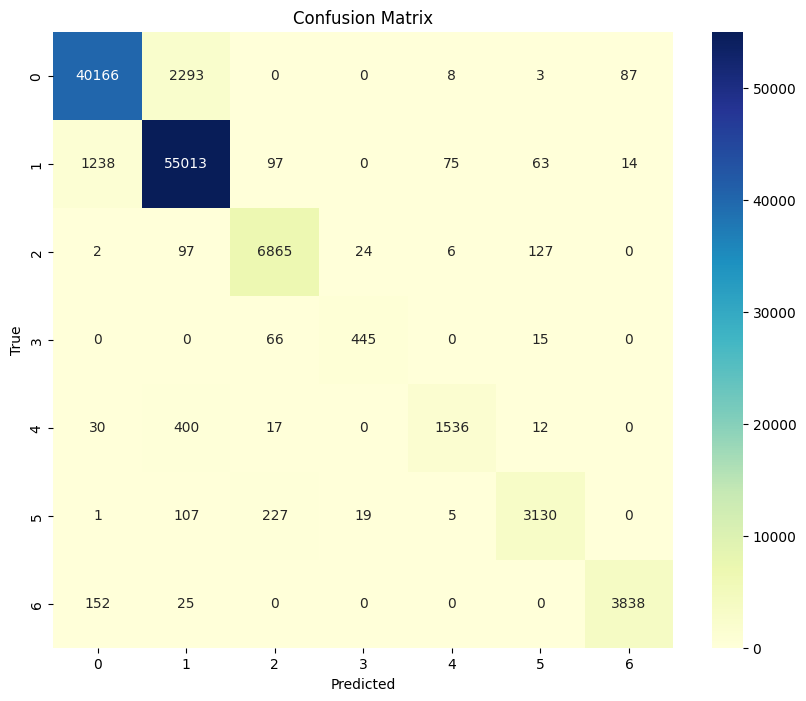

In [16]:
# Step 8: Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [17]:
# Step 9: Classification Report
print("Classification Report:")
print(classification_report(y_val, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.94      0.95     42557
           2       0.95      0.97      0.96     56500
           3       0.94      0.96      0.95      7121
           4       0.91      0.85      0.88       526
           5       0.94      0.77      0.85      1995
           6       0.93      0.90      0.92      3489
           7       0.97      0.96      0.97      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.95    116203

